# COMP333 A2 Giwon Lee - 40160453

### Data set by Giwon Lee according to the PISA database.

# Example 1:

Data set: 

    IQ  Score    Place English  Sex
0   80   70.0    Sixth     Yes    M
1   90   80.0    Third     Yes    M
2   55   54.0  Seventh      No    M
3   88   77.0   Fourth     NaN    F
4  100   45.0   Eighth     Yes    M
5  137   75.0    Fifth      No  NaN
6  125   95.0    First     Yes    M
7  123    NaN      NaN     NaN    F
8   89   43.0   Nineth      No    F
9   90   86.0   Second     Yes    F


PART A:
                 IQ Score Place English Sex
Unique Values    10    10    10      10  10
Observations      9     9     9       2   2
Missing Entries   0     1     1       2   1
Entries          10     9     9       8   9 

Part B.1: 

        IQ Score Place English  Sex
Mode  90.0  43.0   NaN     Yes    M
Mean  97.7  69.4   NaN     NaN  NaN 

Median of Interval values of IQ and Score
{'Interval IQ': 90.0, 'Score': 75.0}
Ratio of place
{'Ratio': NaN} 

Part B.2: 

Number of unique values amongst the entries, for nominal data types: 8 

Part B2: 

                   Ratio Interv

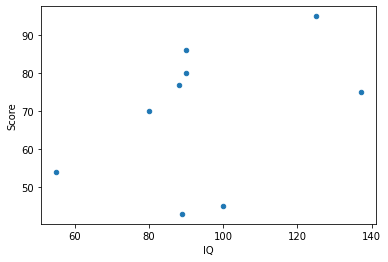

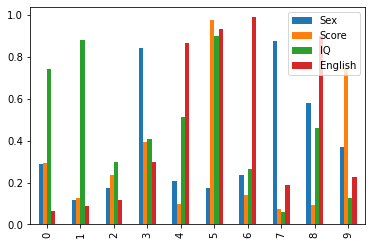

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

Score = [70,80,54,77,45,75,95,np.nan,43,86]
IQ = [80,90,55,88,100,137,125,123,89,90]
Place = ["Sixth","Third","Seventh","Fourth","Eighth","Fifth","First",np.nan,"Nineth","Second"]
English = ["Yes","Yes","No",np.nan,"Yes","No","Yes",np.nan,"No","Yes"]
Sex = ["M","M","M","F","M",np.nan,"M","F","F","F"]
df = pd.DataFrame({"IQ":IQ,"Score":Score,"Place":Place,"English":English,"Sex":Sex})
print("Data set: \n")

print(df)
print('\n')



seri = pd.Series(['Nominal','Ordinal','Interval','Ratio'])

def simpleDDA(ser,df):
    row = {'Observations','Entries','Unique Values','Missing Entries'}
    col = {"IQ":IQ,"Score":Score,"Place":Place,"English":English,"Sex":Sex}
    part_A = pd.DataFrame(index = row , columns = col)
    
    # PART A shows number of observations, number of entries, number of unique values amongst the entries, number of missing entries
    for x in range(4):
        for i in range(5):
            if x == 0: 
                part_A.iloc[x,i] = df.iloc[:,i].size # Size represents the observations
            elif x == 1:    
                part_A.iloc[x,i] = df.iloc[:,i].nunique() # unique values
            elif x == 2:
                part_A.iloc[x,i] = df.iloc[:,i].isna().sum() # Missing entries
            elif x == 3:
                part_A.iloc[x,i] = df.iloc[:,i].count() # Entries 
    print("PART A:")
    print(part_A, "\n")
    
    # Part B.1
    row1 = {'Mode','Mean'}
    col1 = {"IQ":IQ,"Score":Score,"Place":Place,"English":English,"Sex":Sex}
    part_B1 = pd.DataFrame(index = row1, columns = col1)
    
    part_B1.iloc[0,:] = df.mode().iloc[0,:]
    part_B1.iloc[0,2] = np.nan
    
    
    part_B1.iloc[1,0] = round(df.iloc[:,0].mean(),1)
    part_B1.iloc[1,1] = round(df.iloc[:,1].mean(),1)

    
    # ordinal for place
    # interval for IQ,score

    print("Part B.1:","\n")    
    print(part_B1,"\n")
    interval_Val = {"Interval IQ":df.iloc[:,0].median(),"Score":df.iloc[:,1].median()}
    print("Median of Interval values of IQ and Score")
    print(interval_Val)
    print("Ratio of place")
    print("{'Ratio': NaN}",'\n')
    
    
    print("Part B.2: \n")
    # Nominal for 'English'
    print("Number of unique values amongst the entries, for nominal data types:",df.iloc[:,3].str.contains('Yes').count(),'\n')
    
    row2 = {'Stnadard Deviation','Range','IQR'}
    col2 = {'Ordinal','Interval IQ','Interval Score','Ratio'}
    part_B2 = pd.DataFrame(index = row2, columns = col2)

    part_B2.iloc[0,2] = round(df.iloc[:,0].std(numeric_only=None),1)
    part_B2.iloc[1,2] = df.iloc[:,0].min() ,df.iloc[:,0].max()
    part_B2.iloc[2,2] = df.iloc[:,0].quantile([0.75-0.25]).to_string(index=False,header=False)
    
    part_B2.iloc[0,3] = round(df.iloc[:,1].std(numeric_only=None),1)
    part_B2.iloc[1,3] = df.iloc[:,1].min() ,df.iloc[:,0].max()
    part_B2.iloc[2,3] = df.iloc[:,1].quantile([0.75-0.25]).to_string(index=False,header=False)
    print("Part B2: \n")
    print(part_B2,'\n')    
    
    # print(pd.concat([part_A,part_B1,part_B2]))
    
    print("The higher IQ students have the higher score they tend to get.")
    df.plot(kind='scatter',x='IQ',y='Score')
    df2 = pd.DataFrame(np.random.rand(10, 4), columns=["Sex", "Score", "IQ", "English"])
    df2.plot.bar();

simpleDDA(seri,df)

# Example 2:

Data set: 

    IQ  Score English  Sex
0   86   80.0     NaN    M
1  100   90.0     Yes    M
2   65   64.0      No  NaN
3   78   87.0     NaN    F
4   90   55.0     Yes    M
5  135   85.0     NaN  NaN
6  115   65.0     Yes    M
7  133    NaN     NaN  NaN
8   89   43.0      No    F
9   92    NaN     NaN  NaN


PART A:
                  IQ Score English  Sex
Unique Values     10    10      10   10
Observations      10     8       2    2
Missing Entries    0     2       5    4
Entries          NaN   NaN     NaN  NaN 

Part B.1: 

        IQ Score English  Sex
Mode    65  43.0     NaN    M
Mean  98.3  71.1     NaN  NaN 

Median of Interval values of IQ and Score
{'Interval IQ': 91.0, 'Score': 72.5}
Ratio of place
{'Ratio': NaN} 

Part B.2: 

Number of unique values amongst the entries, for nominal data types: 6 

Part B2: 

                   Ratio Interval Score    Ordinal  Interval IQ
IQR                  NaN            NaN       22.9         17.0
Range                NaN            NaN 

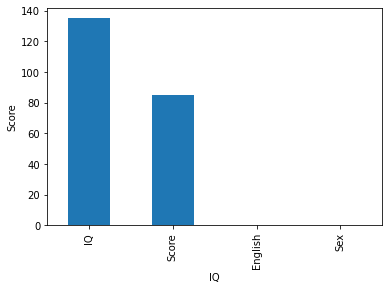

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

Score = [80,90,64,87,55,85,65,np.nan,43,np.nan]
IQ = [86,100,65,78,90,135,115,133,89,92]
# Place = ["Sixth","Third","Seventh","Fourth","Eighth","Fifth","First",np.nan,"Nineth","Second"]
English = [np.nan,"Yes","No",np.nan,"Yes",np.nan,"Yes",np.nan,"No",np.nan]
Sex = ["M","M",np.nan,"F","M",np.nan,"M",np.nan,"F",np.nan]
df = pd.DataFrame({"IQ":IQ,"Score":Score,"English":English,"Sex":Sex})
print("Data set: \n")

print(df)
print('\n')


seri = pd.Series(['Nominal','Ordinal','Interval','Ratio'])

def simpleDDA(ser,df):
    row = {'Observations','Entries','Unique Values','Missing Entries'}
    col = {"IQ":IQ,"Score":Score,"English":English,"Sex":Sex}
    part_A = pd.DataFrame(index = row , columns = col)
    
    # PART A shows number of observations, number of entries, number of unique values amongst the entries, number of missing entries
    for x in range(3):
        for i in range(4):
            if x == 0: 
                part_A.iloc[x,i] = df.iloc[:,i].size # Size represents the observations
            elif x == 1:    
                part_A.iloc[x,i] = df.iloc[:,i].nunique() # unique values
            elif x == 2:
                part_A.iloc[x,i] = df.iloc[:,i].isna().sum() # Missing entries
            elif x == 3:
                part_A.iloc[x,i] = df.iloc[:,i].count() # Entries 
    print("PART A:")
    print(part_A, "\n")
    
    # Part B.1
    row1 = {'Mode','Mean'}
    col1 = {"IQ":IQ,"Score":Score,"English":English,"Sex":Sex}
    part_B1 = pd.DataFrame(index = row1, columns = col1)
    
    part_B1.iloc[0,:] = df.mode().iloc[0,:]
    part_B1.iloc[0,2] = np.nan
    
    
    part_B1.iloc[1,0] = round(df.iloc[:,0].mean(),1)
    part_B1.iloc[1,1] = round(df.iloc[:,1].mean(),1)

    
    # ordinal for place
    # interval for IQ,score

    print("Part B.1:","\n")    
    print(part_B1,"\n")
    interval_Val = {"Interval IQ":df.iloc[:,0].median(),"Score":df.iloc[:,1].median()}
    print("Median of Interval values of IQ and Score")
    print(interval_Val)
    print("Ratio of place")
    print("{'Ratio': NaN}",'\n')
    
    
    print("Part B.2: \n")
    # Nominal for 'English'
    print("Number of unique values amongst the entries, for nominal data types:",df.iloc[:,3].str.contains('Yes').count(),'\n')
    
    row2 = {'Stnadard Deviation','Range','IQR'}
    col2 = {'Ordinal','Interval IQ','Interval Score','Ratio'}
    part_B2 = pd.DataFrame(index = row2, columns = col2)

    part_B2.iloc[0,2] = round(df.iloc[:,0].std(numeric_only=None),1)
    part_B2.iloc[1,2] = df.iloc[:,0].min() ,df.iloc[:,0].max()
    part_B2.iloc[2,2] = df.iloc[:,0].quantile([0.75-0.25]).to_string(index=False,header=False)
    
    part_B2.iloc[0,3] = round(df.iloc[:,1].std(numeric_only=None),1)
    part_B2.iloc[1,3] = df.iloc[:,1].min() ,df.iloc[:,0].max()
    part_B2.iloc[2,3] = df.iloc[:,1].quantile([0.75-0.25]).to_string(index=False,header=False)
    print("Part B2: \n")
    print(part_B2,'\n')    
    
    # print(pd.concat([part_A,part_B1,part_B2]))
    
    print("The higher IQ students have the higher score they tend to get.")
    print(df.plot(kind='scatter',x='IQ',y='Score'))
    print(df.iloc[5].plot(kind="bar"))
    


simpleDDA(seri,df)

# Example 3:

Data set: 

    IQ  Score    Place  Sex
0   24   53.0    Sixth    F
1  211   80.0    Third    F
2   20   54.0  Seventh    F
3   88    NaN   Fourth    M
4   35   45.0   Eighth    F
5   66   75.0    Fifth  NaN
6  125   95.0    First  NaN
7   34    NaN      NaN    M
8   89   43.0   Nineth    M
9   60   25.0   Second    M


PART A:
                 IQ Score Place Sex
Unique Values    10    10    10  10
Observations     10     8     9   2
Missing Entries   0     2     1   2
Entries          10     8     9   8 

Part B.1: 

        IQ Score Place  Sex
Mode    20  25.0   NaN    F
Mean  75.2  58.8   NaN  NaN 

Median of Interval values of IQ and Score
{'Interval IQ': 63.0, 'Score': 53.5}
Ratio of place
{'Ratio': NaN} 

Part B.2: 

Number of unique values amongst the entries, for nominal data types: 8 

Part B2: 

                   Ratio Interval Score    Ordinal  Interval IQ
IQR                  NaN            NaN       58.3         22.9
Range                NaN            NaN  (20, 211)  (25

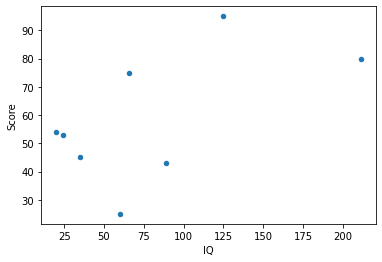

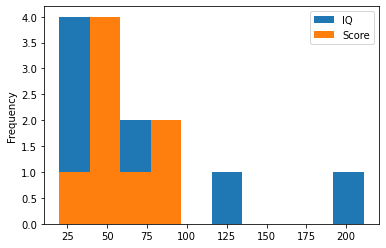

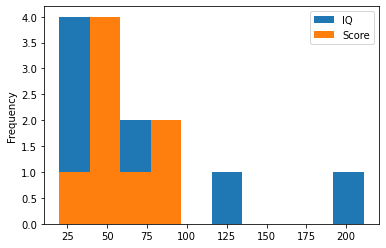

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

Score = [53,80,54,np.nan,45,75,95,np.nan,43,25]
IQ = [24,211,20,88,35,66,125,34,89,60]
Place = ["Sixth","Third","Seventh","Fourth","Eighth","Fifth","First",np.nan,"Nineth","Second"]
Sex = ["F","F","F","M","F",np.nan,np.nan,"M","M","M"]
df = pd.DataFrame({"IQ":IQ,"Score":Score,"Place":Place,"Sex":Sex})
print("Data set: \n")

print(df)
print('\n')



seri = pd.Series(['Nominal','Ordinal','Interval','Ratio'])

def simpleDDA(ser,df):
    row = {'Observations','Entries','Unique Values','Missing Entries'}
    col = {"IQ":IQ,"Score":Score,"Place":Place,"Sex":Sex}
    part_A = pd.DataFrame(index = row , columns = col)
    
    # PART A shows number of observations, number of entries, number of unique values amongst the entries, number of missing entries
    for x in range(4):
        for i in range(4):
            if x == 0: 
                part_A.iloc[x,i] = df.iloc[:,i].size # Size represents the observations
            elif x == 1:    
                part_A.iloc[x,i] = df.iloc[:,i].nunique() # unique values
            elif x == 2:
                part_A.iloc[x,i] = df.iloc[:,i].isna().sum() # Missing entries
            elif x == 3:
                part_A.iloc[x,i] = df.iloc[:,i].count() # Entries 
    print("PART A:")
    print(part_A, "\n")
    
    # Part B.1
    row1 = {'Mode','Mean'}
    col1 = {"IQ":IQ,"Score":Score,"Place":Place,"Sex":Sex}
    part_B1 = pd.DataFrame(index = row1, columns = col1)
    
    part_B1.iloc[0,:] = df.mode().iloc[0,:]
    part_B1.iloc[0,2] = np.nan
    
    
    part_B1.iloc[1,0] = round(df.iloc[:,0].mean(),1)
    part_B1.iloc[1,1] = round(df.iloc[:,1].mean(),1)

    
    # ordinal for place
    # interval for IQ,score

    print("Part B.1:","\n")    
    print(part_B1,"\n")
    interval_Val = {"Interval IQ":df.iloc[:,0].median(),"Score":df.iloc[:,1].median()}
    print("Median of Interval values of IQ and Score")
    print(interval_Val)
    print("Ratio of place")
    print("{'Ratio': NaN}",'\n')
    
    
    print("Part B.2: \n")
    # Nominal for 'English'
    print("Number of unique values amongst the entries, for nominal data types:",df.iloc[:,3].str.contains('Yes').count(),'\n')
    
    row2 = {'Stnadard Deviation','Range','IQR'}
    col2 = {'Ordinal','Interval IQ','Interval Score','Ratio'}
    part_B2 = pd.DataFrame(index = row2, columns = col2)

    part_B2.iloc[0,2] = round(df.iloc[:,0].std(numeric_only=None),1)
    part_B2.iloc[1,2] = df.iloc[:,0].min() ,df.iloc[:,0].max()
    part_B2.iloc[2,2] = df.iloc[:,0].quantile([0.75-0.25]).to_string(index=False,header=False)
    
    part_B2.iloc[0,3] = round(df.iloc[:,1].std(numeric_only=None),1)
    part_B2.iloc[1,3] = df.iloc[:,1].min() ,df.iloc[:,0].max()
    part_B2.iloc[2,3] = df.iloc[:,1].quantile([0.75-0.25]).to_string(index=False,header=False)
    print("Part B2: \n")
    print(part_B2,'\n')    
    
    # print(pd.concat([part_A,part_B1,part_B2]))
    
    print("The higher IQ students have the higher score they tend to get.")
    print(df.plot(kind='scatter',x='IQ',y='Score'))
    print(df.plot(kind='hist',x='Sex'))



simpleDDA(seri,df)